# NCAE on MNIST Dataset
Deep Learning of Part-based Representation of Data Using Sparse Autoencoders with Nonnegativity Constraints from Hosseini-Asl et al. (2016).
* Dimension of the encoding : 100
* Shallow Encoder and Decoder with non-tied weights and sigmoid activations 
* Sparsity of the encoding enforced with deviation of expected activation of hidden units from expected objective, using the KL divergence as deviation measure:
    * Sparsity objective : p = 0.05
    * Weight of the regularization term : beta = 3
* Non-Negativity of the weigths enforced with asymetric weight decay (no decay on positive weights):
    * Weight of the decay: lambda = 0.003

In [51]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
import datetime
import morphoMaths
import pandas as pd
from scipy import io
import metrics
import atoms_analysis

In [52]:
FILE_PATH = "../"
x_train, _, x_test, _ = bastien_utils.load_data_MNIST(train=True, test=True, subsetTest=False)
idx_small = np.arange(10)
idx_small[2]=31
x_small = x_test[idx_small]
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [53]:
h_test = io.loadmat("../Results/MNIST/NCAE/NCAE_MNIST_p_0.05_lambda_0.003_beta_3_/h_test.mat")['h_test']
x_rec_test = io.loadmat("../Results/MNIST/NCAE/NCAE_MNIST_p_0.05_lambda_0.003_beta_3_/x_rec_test.mat")['x_rec_test']
atoms = io.loadmat("../Results/MNIST/NCAE/NCAE_MNIST_p_0.05_lambda_0.003_beta_3_/W2.mat")['W2']
bias = io.loadmat("../Results/MNIST/NCAE/NCAE_MNIST_p_0.05_lambda_0.003_beta_3_/b2.mat")['b2']

In [54]:
print("h_test.shape: ", h_test.shape)
print("x_rec_test.shape: ", x_rec_test.shape)
print("atoms.shape: ", atoms.shape)
print("bias.shape: ", bias.shape)

h_test.shape:  (100, 10000)
x_rec_test.shape:  (784, 10000)
atoms.shape:  (784, 100)
bias.shape:  (784, 1)


In [55]:
x_rec_test = np.swapaxes(np.transpose(x_rec_test).reshape((10000, 28, 28, 1)), 1,2)
atoms = np.swapaxes(np.transpose(atoms).reshape((100,28,28,1)), 1,2)
h_test = np.transpose(h_test)
bias = bias.reshape((28,28,1))

In [56]:
print("h_test.shape: ", h_test.shape)
print("x_rec_test.shape: ", x_rec_test.shape)
print("atoms.shape: ", atoms.shape)
print("bias.shape: ", bias.shape)

h_test.shape:  (10000, 100)
x_rec_test.shape:  (10000, 28, 28, 1)
atoms.shape:  (100, 28, 28, 1)
bias.shape:  (28, 28, 1)


In [57]:
x_rec_small = x_rec_test[idx_small]

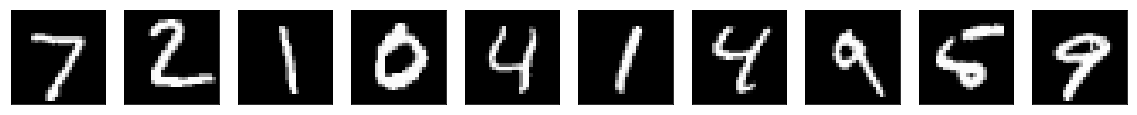

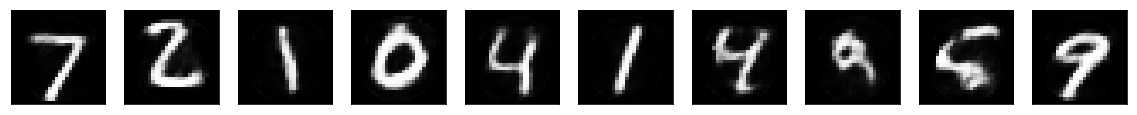

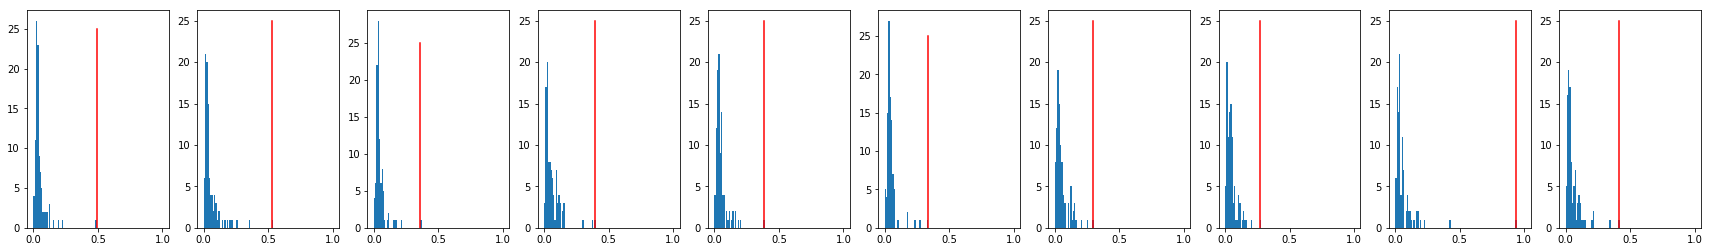

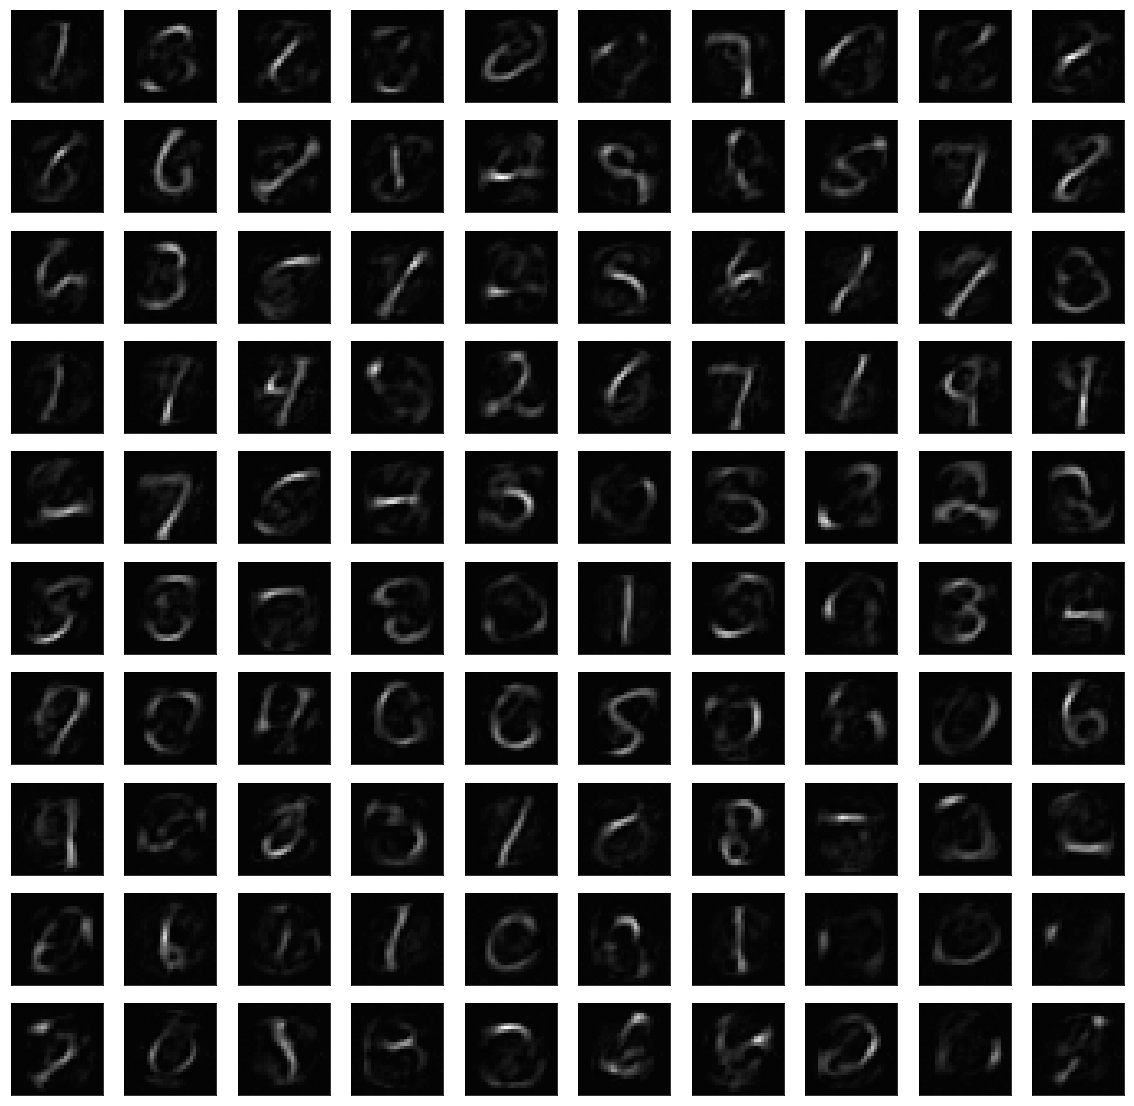

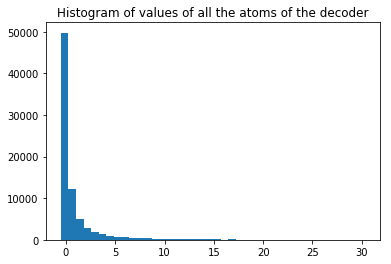

In [17]:
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(x_rec_small)
metrics.plot_histograms_of_the_encoding(h_test[idx_small])
bastien_utils.plot_all_images(atoms)
plt.hist(atoms.flatten(), bins=40)
plt.title('Histogram of values of all the atoms of the decoder')
plt.show()

Original images and reconstructions - Reconstruction error:  0.009773386638893091


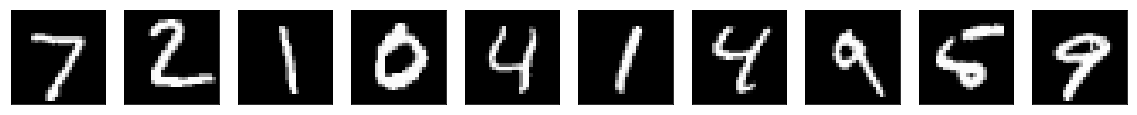

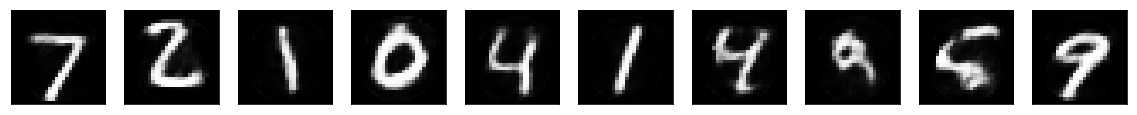

Histograms of the encodings - Sparsity (Hoyer):  0.354095133603307


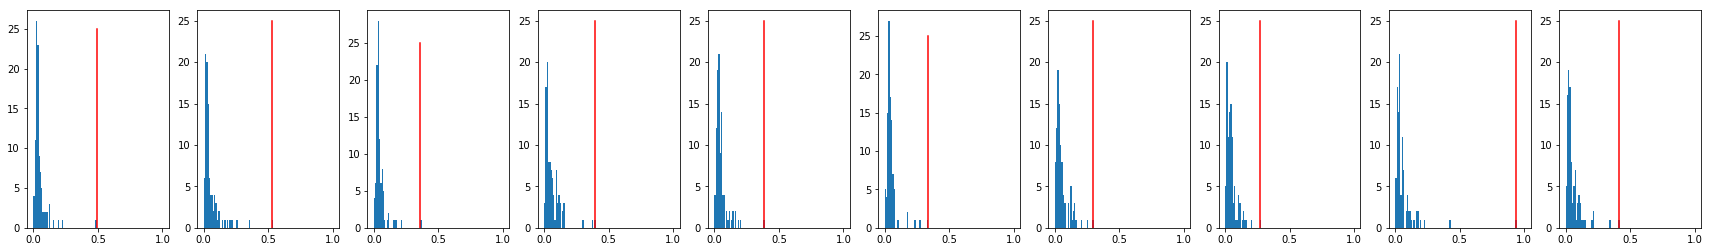

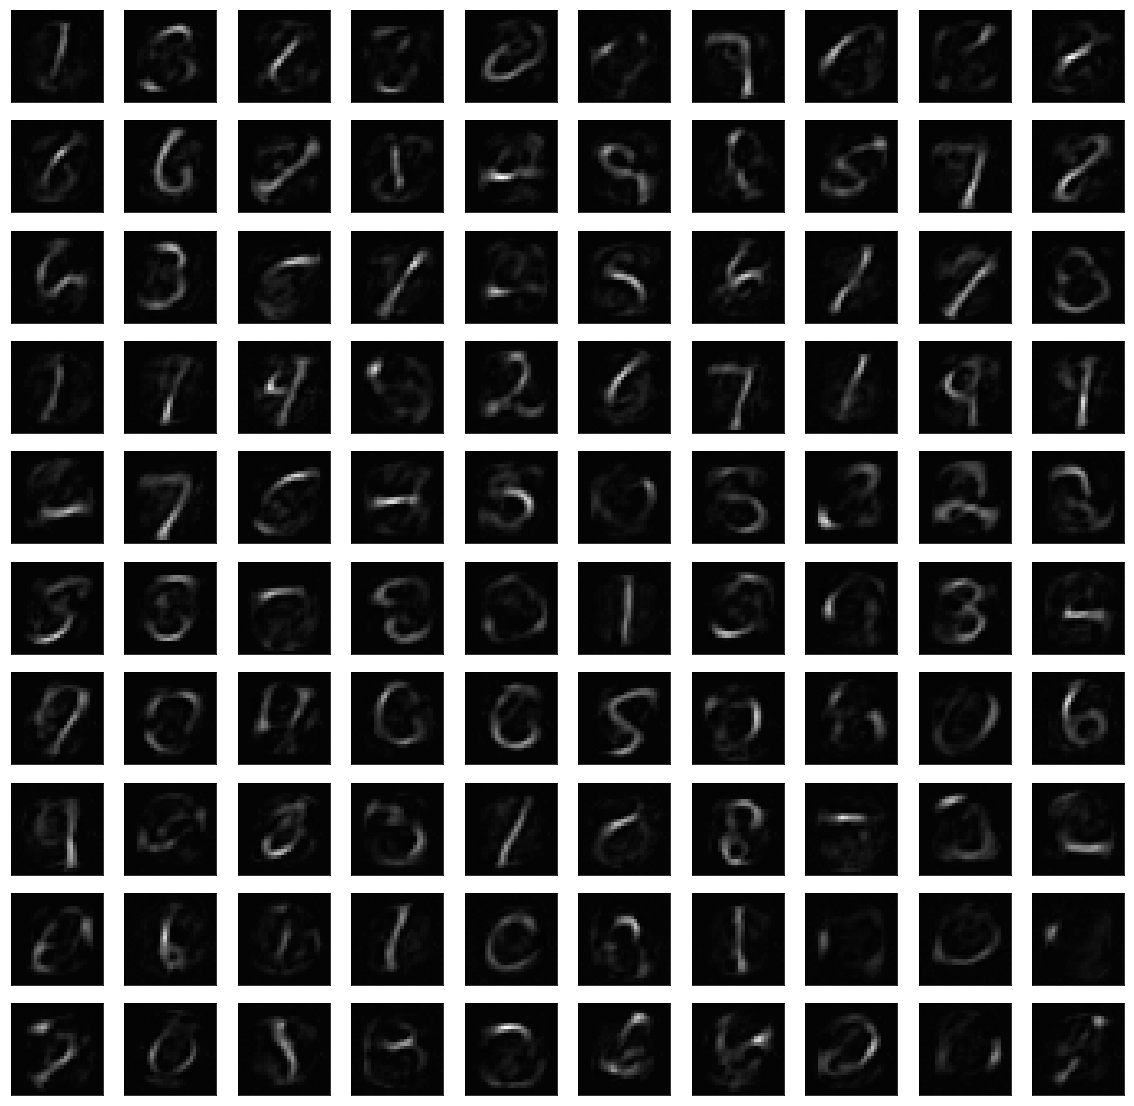

Atom images of the decoder


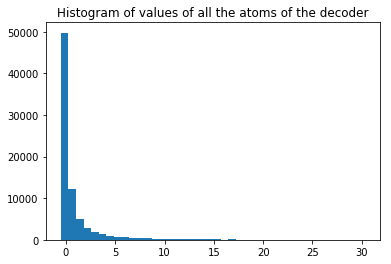

In [58]:
print('Original images and reconstructions - Reconstruction error: ', np.mean(np.square(x_test-x_rec_test)))
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(x_rec_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', metrics.sparsity_Hoyer(h_test))
metrics.plot_histograms_of_the_encoding(h_test[idx_small])
bastien_utils.plot_all_images(atoms)
print('Atom images of the decoder')
plt.hist(atoms.flatten(), bins=40)
plt.title('Histogram of values of all the atoms of the decoder')
plt.show()

Dilatation of the original images


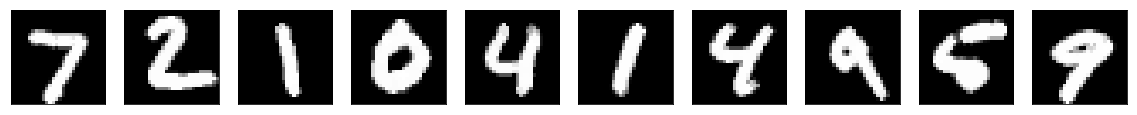

Dilatation of the reconstructions


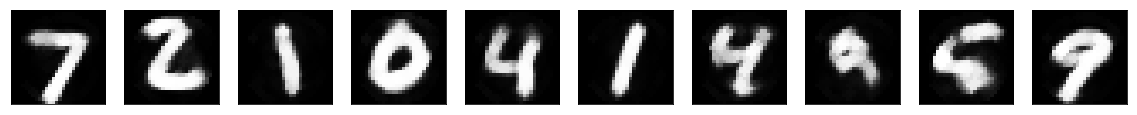

Original images and max-approximation to dilatation
Max-approx error to original:  0.17562454388709403  - Max-approx error to reconstruction:  0.15983585465938455


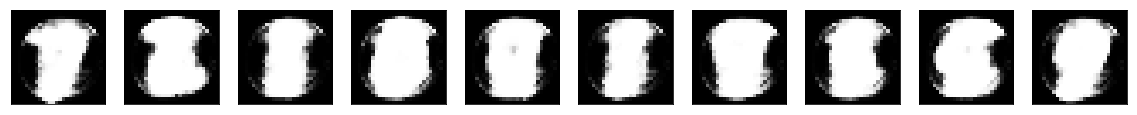

Dilated of the atom images of the decoder


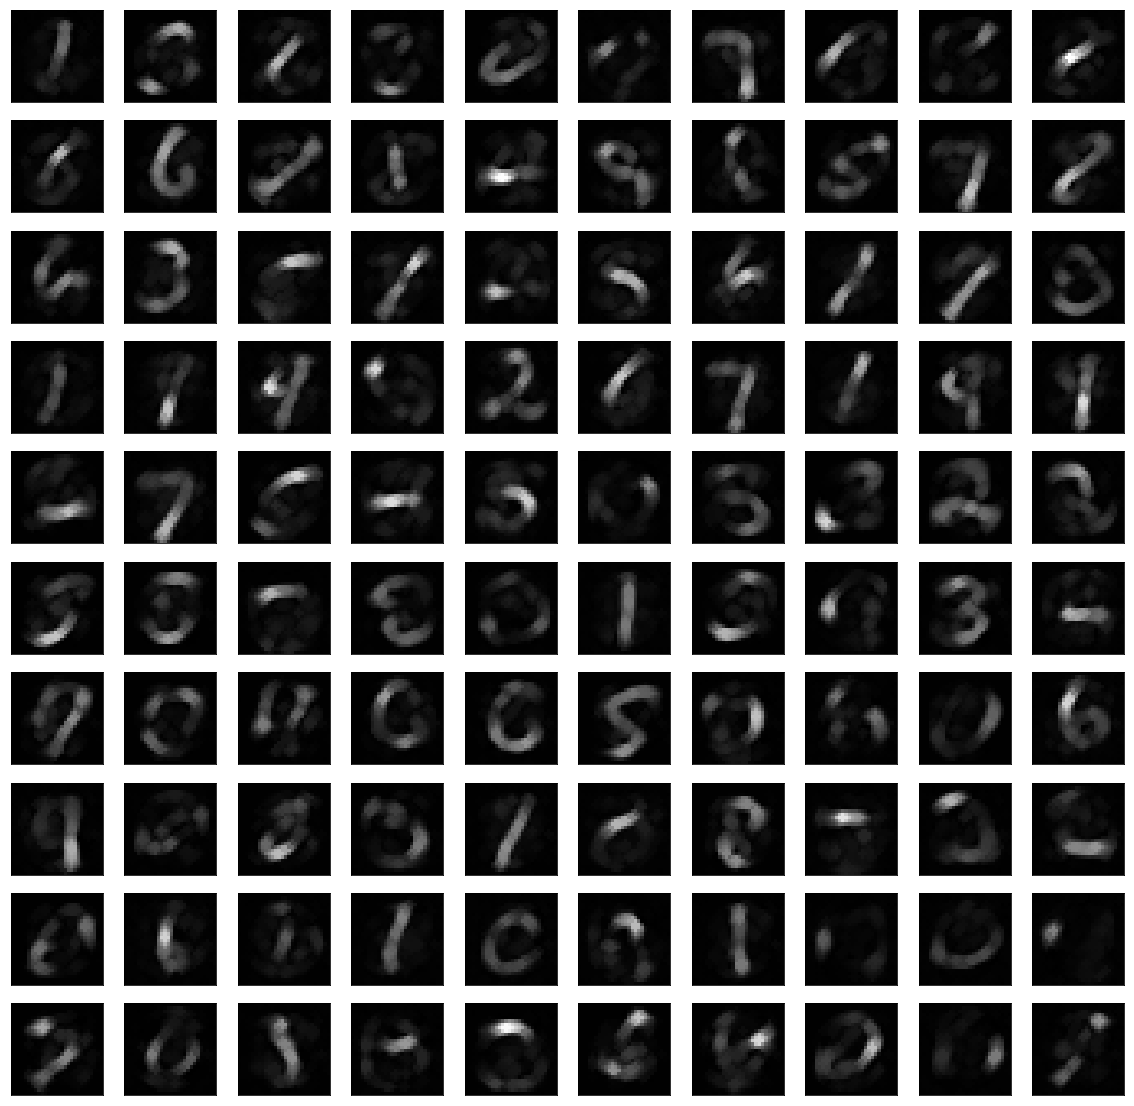

In [59]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_small, SE_scale=1))
atoms_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1)
max_approx_x_test = sigmoid(np.dot(h_test, atoms_dil.reshape((100, 784))) + np.transpose(bias.reshape((784,1)))).reshape((10000, 28, 28, 1))
print('Original images and max-approximation to dilatation')
test_max_approx_to_Original = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_test, SE_scale=1)-max_approx_x_test))
test_max_approx_to_Rec = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_test, SE_scale=1)-max_approx_x_test))
print('Max-approx error to original: ', test_max_approx_to_Original, ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec)
bastien_utils.plot_all_images(max_approx_x_test[idx_small])
print('Dilated of the atom images of the decoder')
bastien_utils.plot_all_images(atoms_dil)

In [61]:
atoms_dil_2 = np.transpose(np.swapaxes(atoms_dil,1,2).reshape((100,784)))
h_test_2 = np.transpose(h_test)

In [62]:
atoms_dil_2.shape

(784, 100)

In [63]:
h_test_2.shape

(100, 10000)

In [70]:
max_approx_2 = np.dot(atoms_dil_2, h_test_2) + bias.reshape((784,1))
max_approx_2 = np.swapaxes(np.transpose(max_approx_2).reshape((10000, 28, 28, 1)), 1,2)

In [71]:
max_approx_2.shape

(10000, 28, 28, 1)

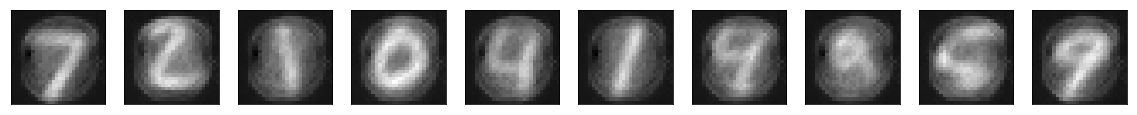

In [72]:
bastien_utils.plot_all_images(max_approx_2[idx_small])

In [73]:
max_approx_2 = sigmoid(np.dot(atoms_dil_2, h_test_2) + bias.reshape((784,1)))
max_approx_2 = np.swapaxes(np.transpose(max_approx_2).reshape((10000, 28, 28, 1)), 1,2)

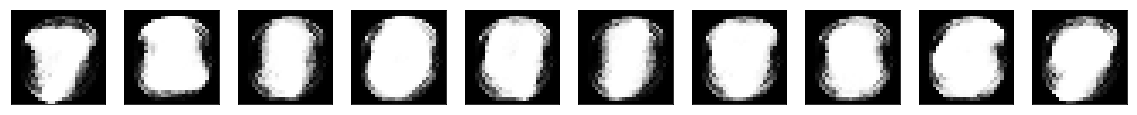

In [74]:
bastien_utils.plot_all_images(max_approx_2[idx_small])